In [1]:
import pandas as pd
import numpy as np

from IPython.display import display
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
warnings.filterwarnings("ignore")

In [2]:
DATA_DIR = '../data/raw/'
df_train = pd.read_csv(DATA_DIR + 'train.csv')
df_train_demog = pd.read_csv(DATA_DIR + 'train_demographics.csv')

df_test = pd.read_csv(DATA_DIR + 'test.csv')
df_test_demog = pd.read_csv(DATA_DIR + 'test_demographics.csv')

In [3]:
df_train

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574940,SEQ_065531_000048,Non-Target,SEQ_065531,48,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.503906,...,62.0,65.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,71.0
574941,SEQ_065531_000049,Non-Target,SEQ_065531,49,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.773438,...,71.0,72.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
574942,SEQ_065531_000050,Non-Target,SEQ_065531,50,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.082031,...,80.0,77.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
574943,SEQ_065531_000051,Non-Target,SEQ_065531,51,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.964844,...,72.0,77.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [13]:
print('train cols:', *[col for col in df_train.columns if col[:4] not in ('acc_', 'rot_', 'thm_', 'tof_')])
print('test cols: ', *[col for col in df_test.columns if col[:4] not in ('acc_', 'rot_', 'thm_', 'tof_')])

train cols: row_id sequence_type sequence_id sequence_counter subject orientation behavior phase gesture
test cols:  row_id sequence_id sequence_counter subject


array([[<Axes: title={'center': '0'}>]], dtype=object)

127.0
700
700 671 647 630 567 429 426 398 393 390 389 374 371 360 360


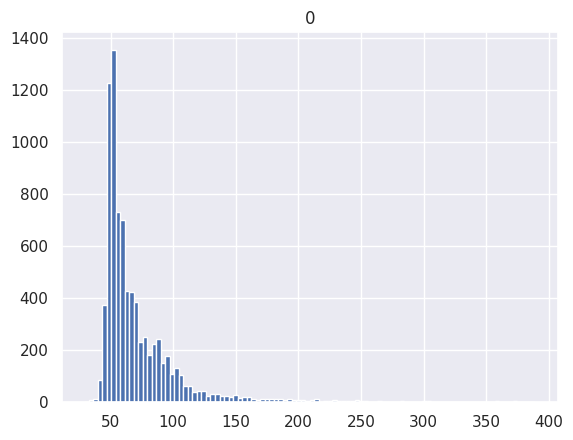

In [ ]:
# sequence lengths

df_lens = df_train.groupby('sequence_id').size().sort_values(ascending=False).rename('0').reset_index()
display(df_lens[10:].hist(bins=100, ))

print(df_lens['0'].quantile(0.95))
print(df_lens['0'].max())
print(*df_lens['0'][:15])

In [59]:
df_train

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63,acc_mag
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.723882
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.832678
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.561136
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.886537
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0,11.128921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574940,SEQ_065531_000048,Non-Target,SEQ_065531,48,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.503906,...,65.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,71.0,9.150011
574941,SEQ_065531_000049,Non-Target,SEQ_065531,49,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.773438,...,72.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.972424
574942,SEQ_065531_000050,Non-Target,SEQ_065531,50,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.082031,...,77.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,8.021313
574943,SEQ_065531_000051,Non-Target,SEQ_065531,51,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.964844,...,77.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.919849


array([[<Axes: title={'center': '0'}>]], dtype=object)

37.0
71
71 66 64 62 59 58 57 57 56 56 56 55 55 54 54


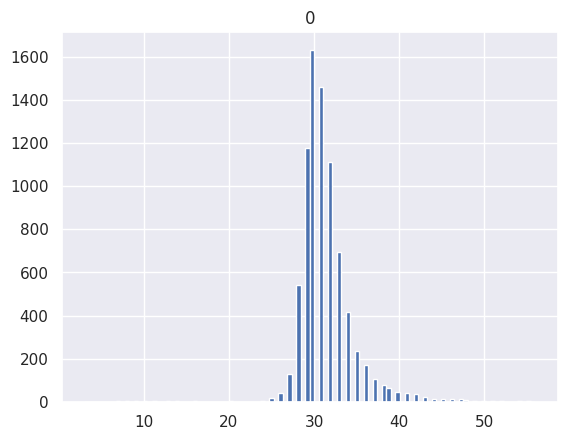

In [ ]:
# sequence lengths whithout Transition phase (only Gesture phase)

df_lens = df_train[df_train['phase'] == 'Gesture'].groupby('sequence_id').size().sort_values(ascending=False).rename('0').reset_index()
display(df_lens[10:].hist(bins=100, ))

print(df_lens['0'].quantile(0.95))
print(df_lens['0'].max())
print(*df_lens['0'][:15])

array(['Seated Lean Non Dom - FACE DOWN', 'Lie on Side - Non Dominant',
       'Seated Straight', 'Lie on Back'], dtype=object)

<Axes: >

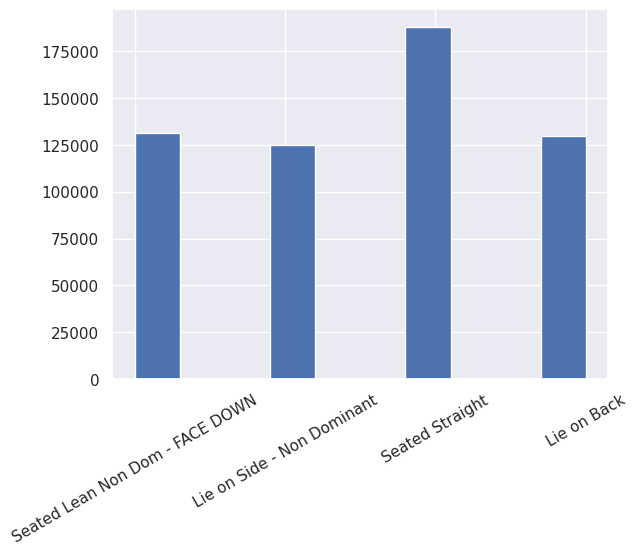

In [ ]:
display(df_train['orientation'].unique())

# Каждая sequence имеет только одно значение orientation
# df_train.groupby('sequence_id')['orientation'].nunique().nunique() == 1


df_train['orientation'].hist(xrot=30)

array(['Relaxes and moves hand to target location',
       'Hand at target location', 'Performs gesture',
       'Moves hand to target location'], dtype=object)

<Axes: >

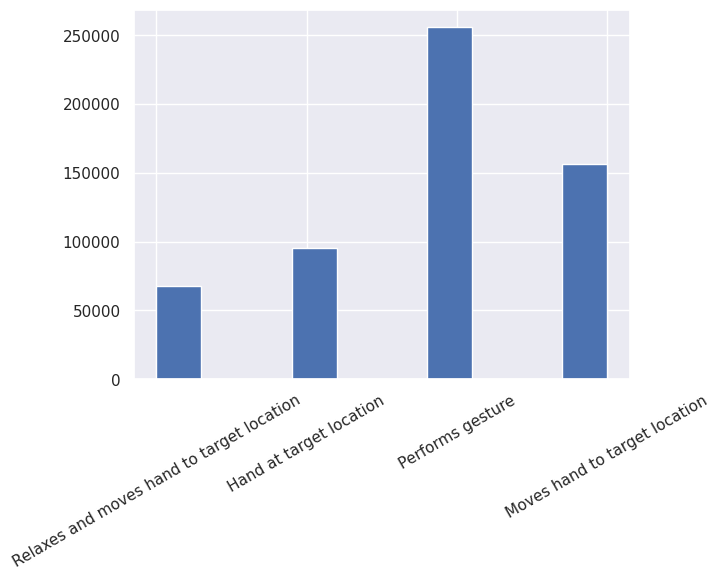

In [ ]:
display(df_train['behavior'].unique())

# Каждая sequence имеет 2 или 3 значения behavior
# df_train.groupby('sequence_id')['behavior'].nunique().nunique() == array([3, 2])

df_train['behavior'].hist(xrot=30)

In [42]:
df_train['acc_mag'] = df_train[['acc_x', 'acc_y', 'acc_z']].apply(
    lambda x: np.sqrt(x['acc_x'] ** 2 + x['acc_y'] ** 2 + x['acc_z'] ** 2), axis=1
)

<Axes: >

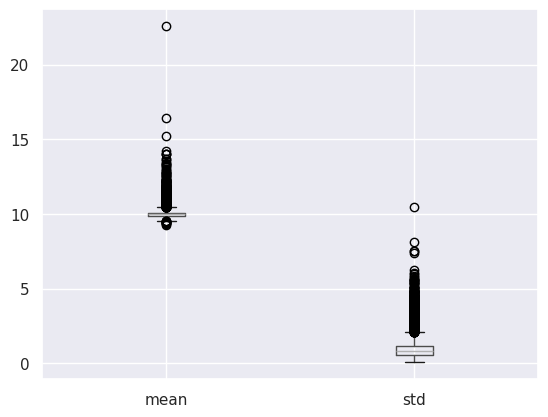

In [44]:
df_train.groupby('sequence_id')['acc_mag'].agg(['mean', 'std']).reset_index().boxplot()

In [54]:
tmp = df_train.groupby('sequence_id')['acc_mag'].agg(['mean', 'std']).join(
    df_train[['sequence_id', 'sequence_type']].drop_duplicates().set_index('sequence_id'), 
    on='sequence_id', 
    how='left')

tmp

,mean,std,sequence_type
sequence_id,,,
SEQ_000007,10.021660,0.343905,Target
SEQ_000008,10.018998,0.664317,Target
SEQ_000013,10.073545,0.728796,Target
SEQ_000016,9.906489,0.623425,Non-Target
SEQ_000018,9.998449,0.292560,Target
...,...,...,...
SEQ_065508,9.922443,0.874646,Non-Target
SEQ_065519,10.099446,0.477304,Target
SEQ_065522,9.969736,0.677241,Target


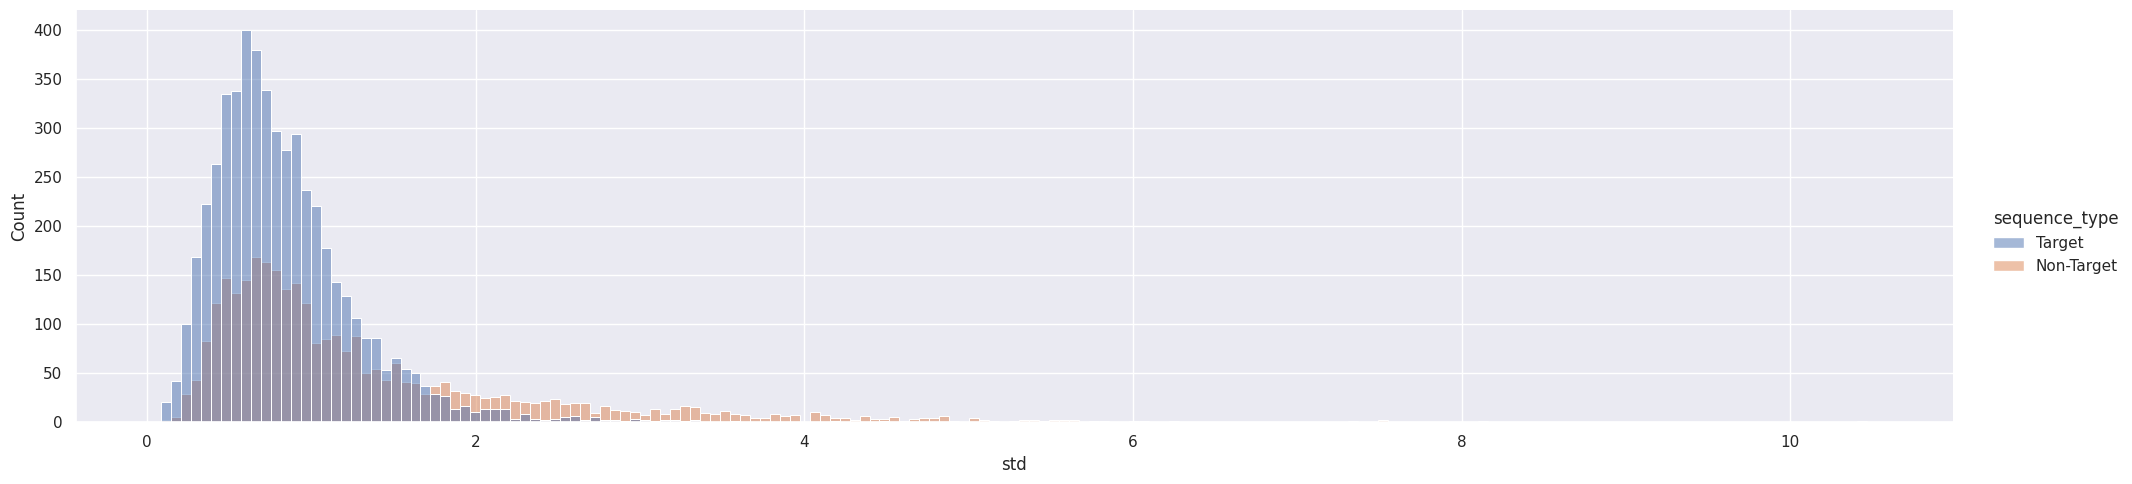

In [56]:
sns.displot(  
    data=tmp,
    x="std",
    # y="target_col", # второй стобец чтобы посмотреть на распределение X and Y в каждом классе в hue
    hue="sequence_type",
    legend=True,
    aspect=4,
    kind="hist",  # kde
    alpha=0.5,
);

## Demographics

In [ ]:
display(df_train_demog)

,subject,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
0,SUBJ_000206,1,41,1,1,172.0,50,25.0
1,SUBJ_001430,0,11,0,1,167.0,51,27.0
2,SUBJ_002923,1,28,1,0,164.0,54,26.0
3,SUBJ_003328,1,33,1,1,171.0,52,25.0
4,SUBJ_004117,0,15,0,1,184.0,54,28.0
...,...,...,...,...,...,...,...,...
76,SUBJ_063319,1,25,1,1,173.0,50,29.0
77,SUBJ_063346,1,42,1,1,183.0,51,26.0
78,SUBJ_063447,1,36,0,1,175.0,54,25.0
79,SUBJ_063464,0,15,0,1,162.0,43,23.0


In [ ]:
display(df_test_demog)
# В тесте новые subjects

,subject,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
0,SUBJ_016452,1,25,1,1,165.0,52,23.0
1,SUBJ_055840,0,13,0,1,177.0,52,27.0
